In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("cleaned_credit.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [22]:
data.shape

(283726, 30)

### checking outlaiers by boxplot

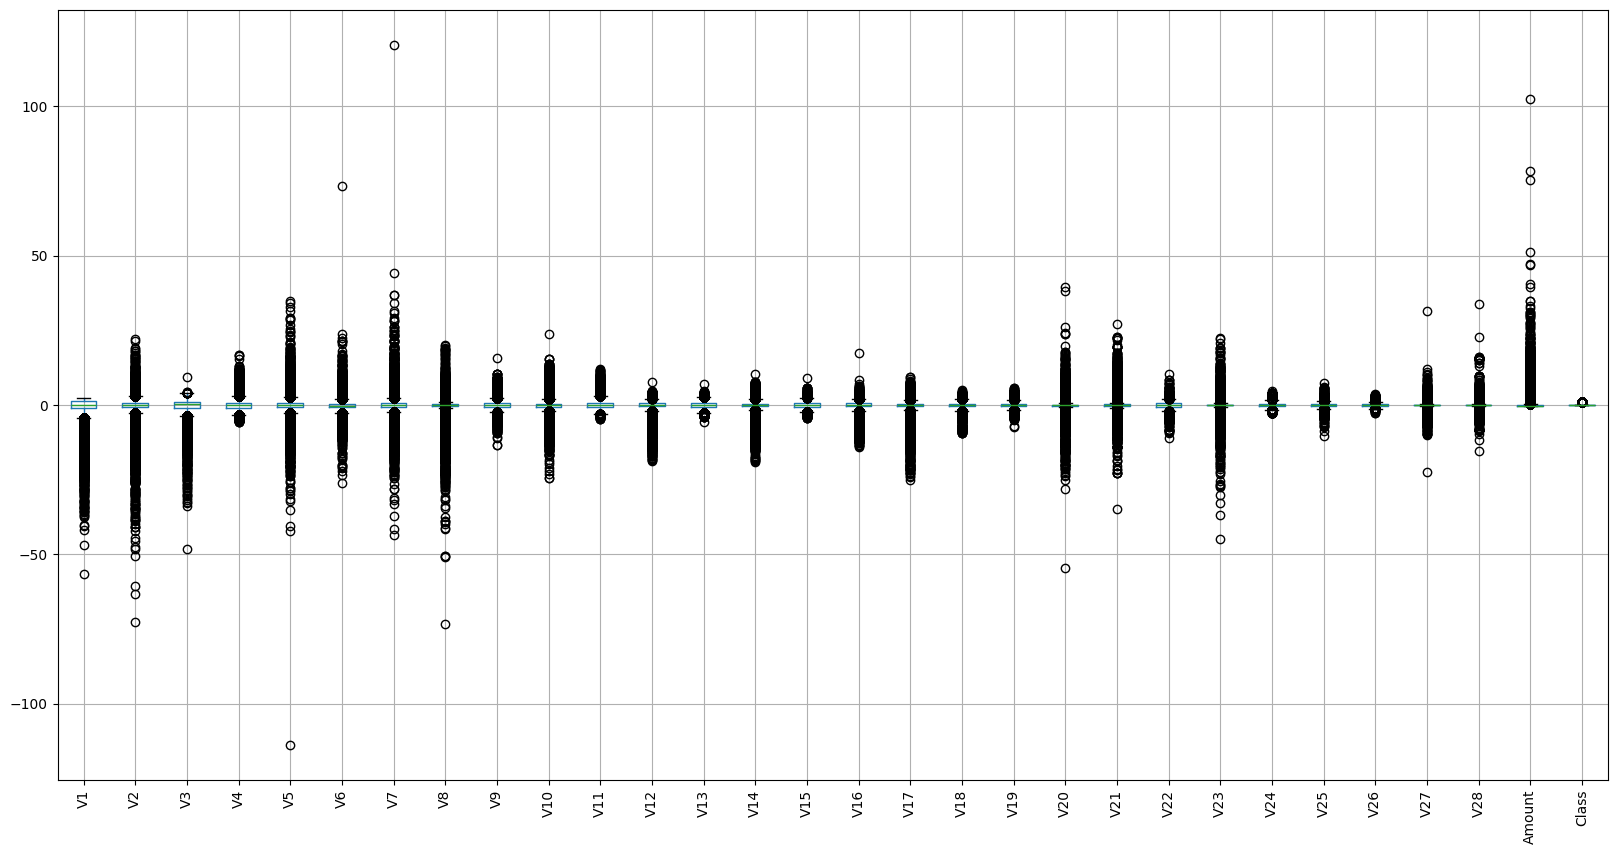

In [25]:
data.boxplot(figsize=(20, 10))
plt.xticks(rotation=90)
plt.show()

#### checking otlaiers


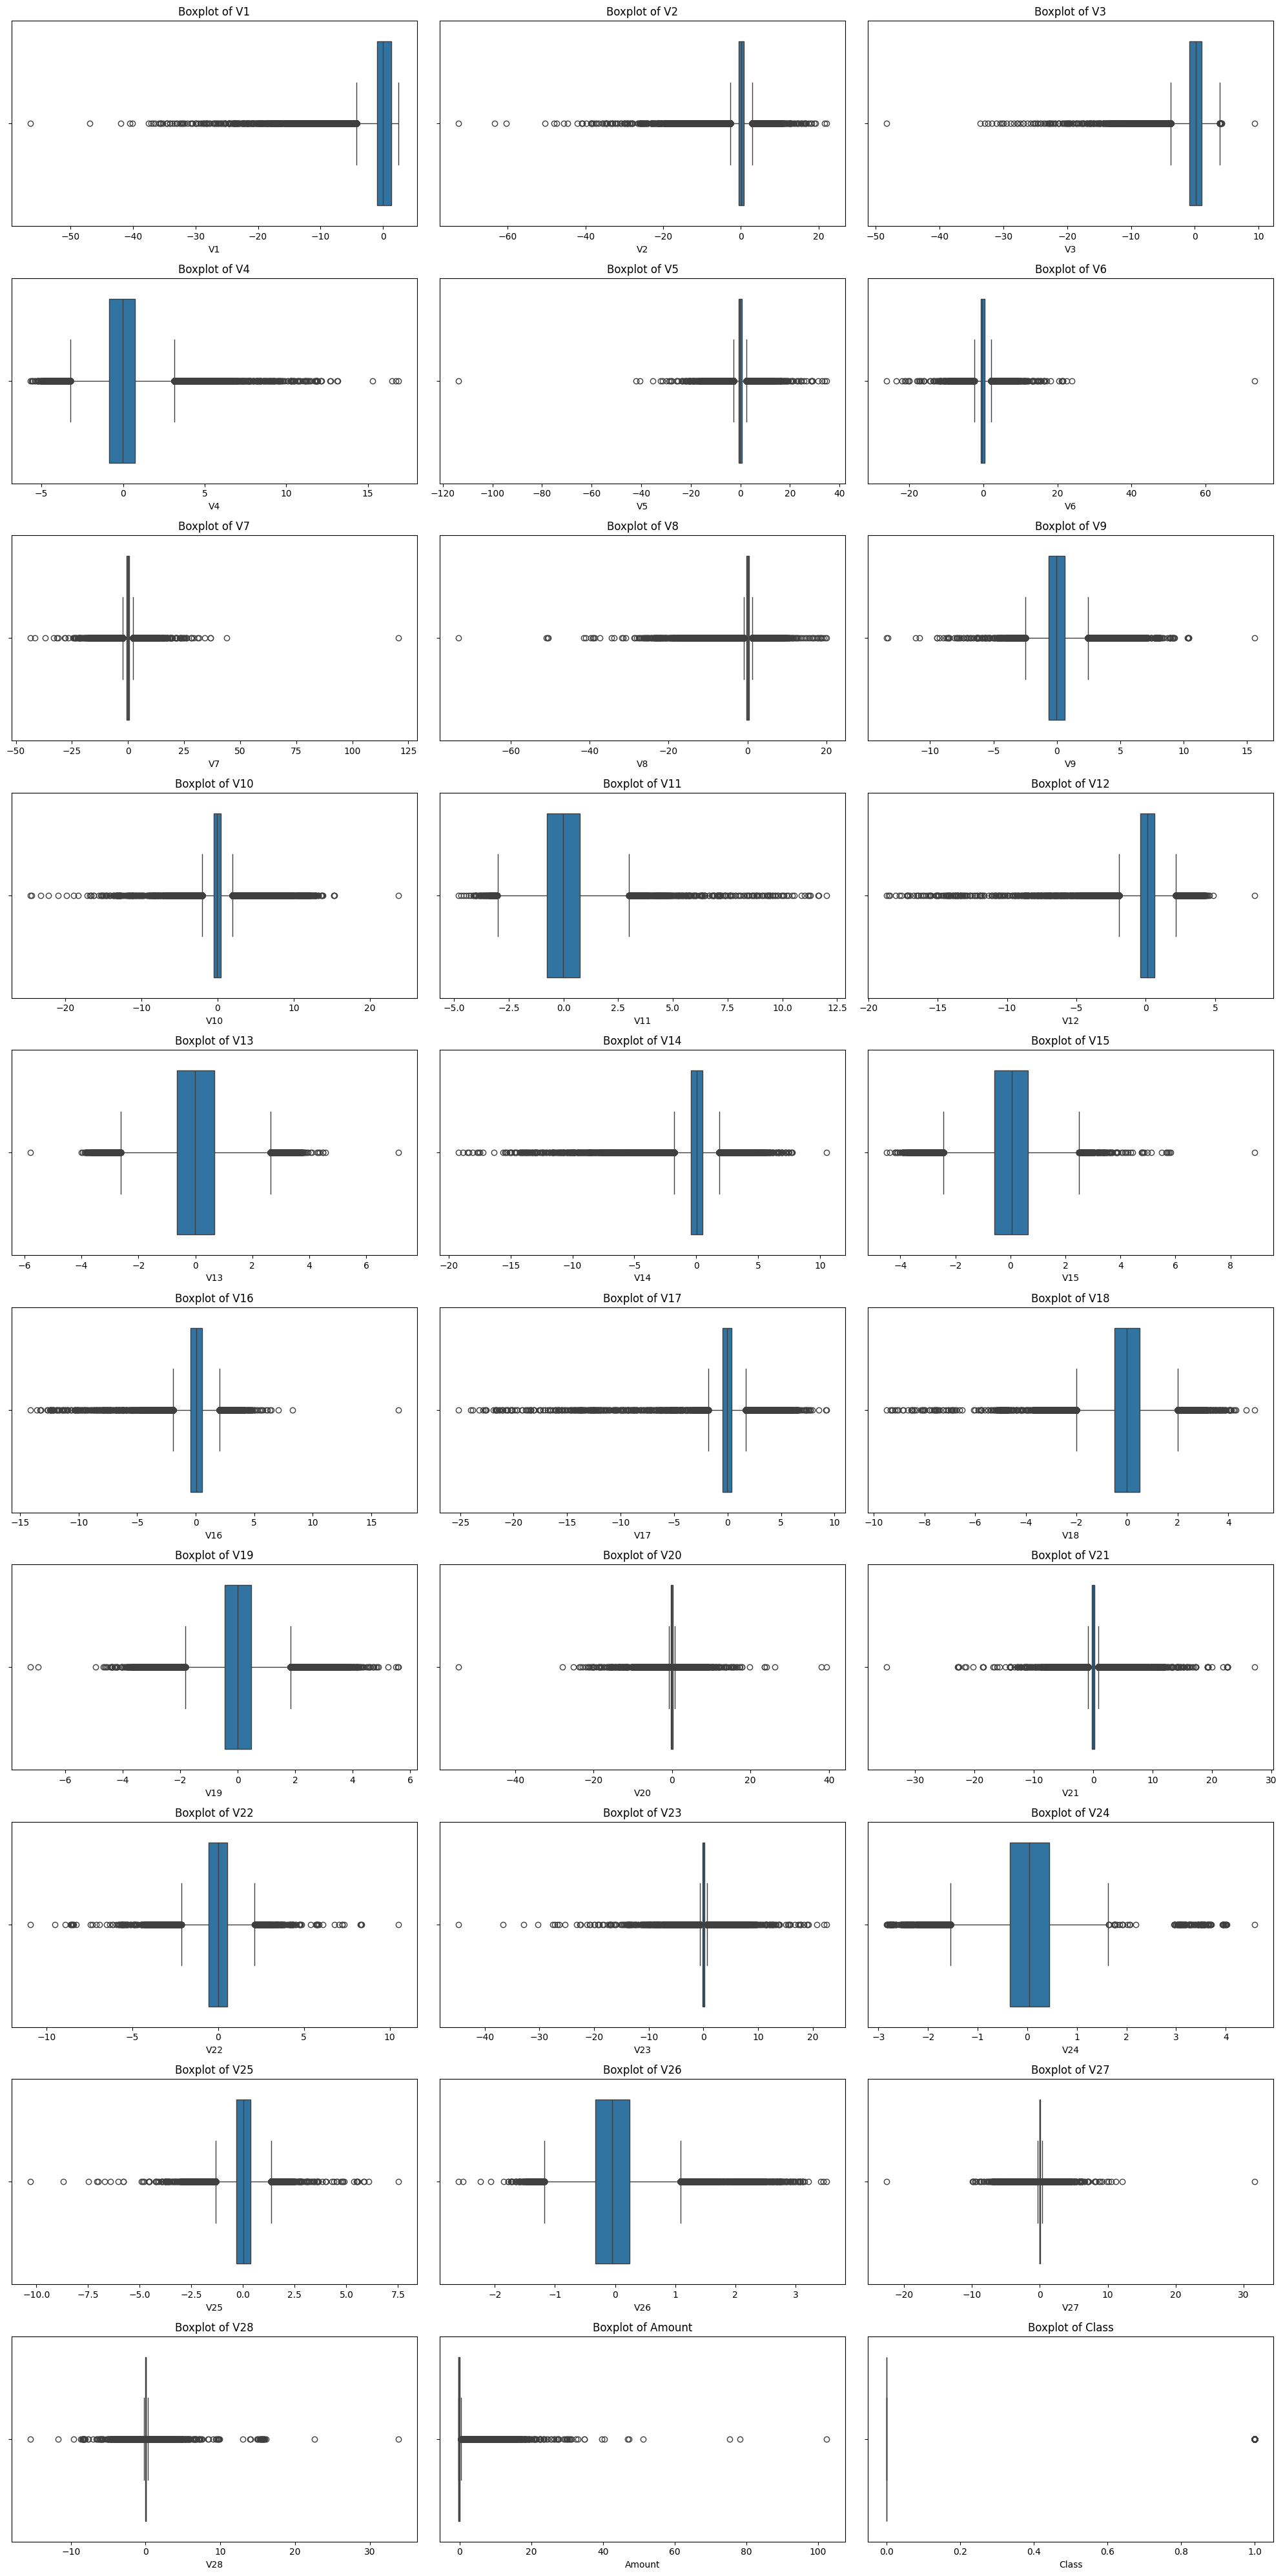

In [26]:
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### creating function to remove outlairs from all the columns

In [27]:
def filter_outliers(df, columns):
    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        iqr = Q3 - Q1
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

filtered_data = filter_outliers(data,data.columns)

In [28]:
filtered_data.shape

(109819, 30)

In [29]:
outliers_percent = len(filtered_data)/len(data)

In [30]:
outliers_percent*100 ## by removing outlaiers we are getting only 38% of data

38.70600508941725

In [32]:
filtered_data.Class.value_counts()

Class
0    109819
Name: count, dtype: int64

#### By removing outlaiers ,we are getting only one target column